<a href="https://colab.research.google.com/github/01PrathamS/Backprop/blob/main/try_2_senpai_karpathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

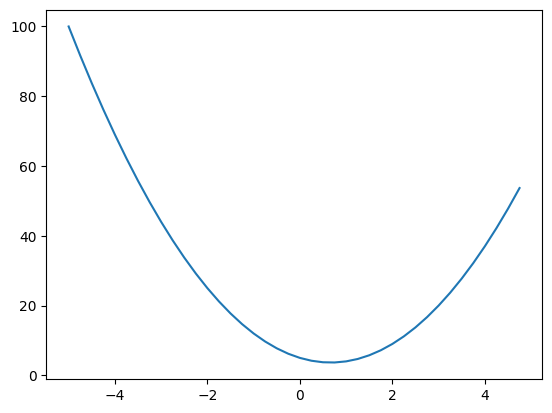

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

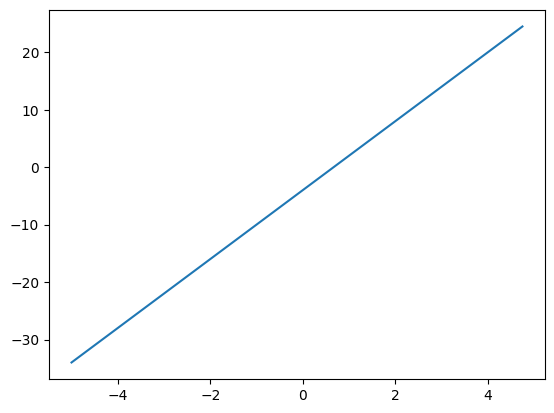

In [ ]:
def der_f(x):
  return 6*x - 4
ys = der_f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.001
x = 3.0
(f(x+h) - f(x)) / h

14.00300000000243

In [ ]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [ ]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c
print("d1:", d1)
print("d2:", d2)
print("slope:", (d2 - d1) / h)

d1: 4.0
d2: 4.0001
slope: 0.9999999999976694


In [ ]:
class Value:

  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    return Value(self.data + other.data)

a = Value(2.0)
b = Value(-3.0)
a + b, a.__add__(b)

(Value(data=-1.0), Value(data=-1.0))

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+')

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    return Value(t, (self, ), 'tanh')


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e= a*b; e.label = 'e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L

Value(data=-8.0)

In [6]:
from graphviz import Digraph

def trace(root):

  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankir': 'LR'})

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))

    dot.node(name=uid, label= "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      dot.node(name=uid + n._op, label=n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

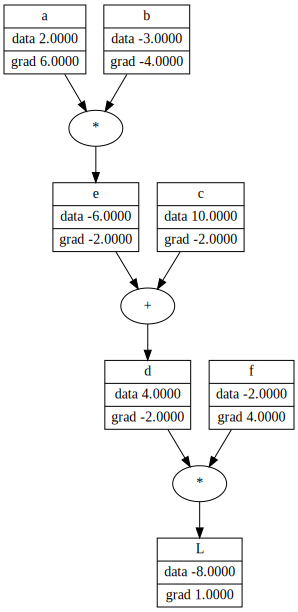

In [ ]:
draw_dot(L)

In [ ]:
L.grad = 1.0

In [ ]:
f.grad = 4.0
d.grad = -2.0

In [ ]:
c.grad = -2.0
e.grad = -2.0

In [ ]:
a.grad = 6.0
b.grad = -4.0

L = d  * f

dL/dd = f

--------------------------------------------------

d*f = L
c+e = d

dL/dc = dL/dd * dd/dc = f * 1 = f

dd/dc = 1.0
dd/de  = 1.0

----------------------------------------------------------------------

a*b = e
c+e = d
d*f = L

de/da = ((a+h)*b - (a*b))/h = b

dL/da = dL/dd * dd/de * de/da
      = f * 1.0 * b
      = -2.0 * 1.0 * -3.0
      = 6.0

dL/db = dL/dd * dd/de * de/db
      = f * 0.1 * a
      = -4.0

-------------------------------------------------------------

Backward Propagation is just a recursive application of chain rule
backwards through computation graph

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a*b
d = e + c
L = d*f

print(L.data)

-7.286496


In [ ]:
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label='d'
  f = Value(-2.0, label='f')
  L = d*f; L.label='L'
  L1 = L.data

  a = Value(2.0  , label='a')
  b = Value(-3.0 + h, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label='d'
  f = Value(-2.0, label='f')
  L = d*f; L.label='L'

  L2 = L.data

  print((L2 - L1)/h)


lol()

-3.9999999999995595


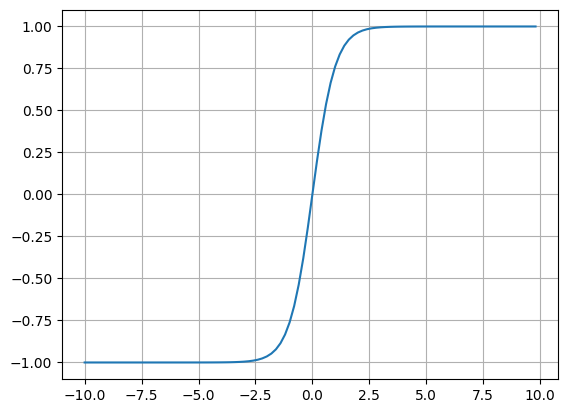

In [ ]:
plt.plot(np.arange(-10, 10, 0.2), np.tanh(np.arange(-10, 10, 0.2))); plt.grid();

In [7]:
## inputs x1 , x2

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

## weights w1, w2

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

## bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'


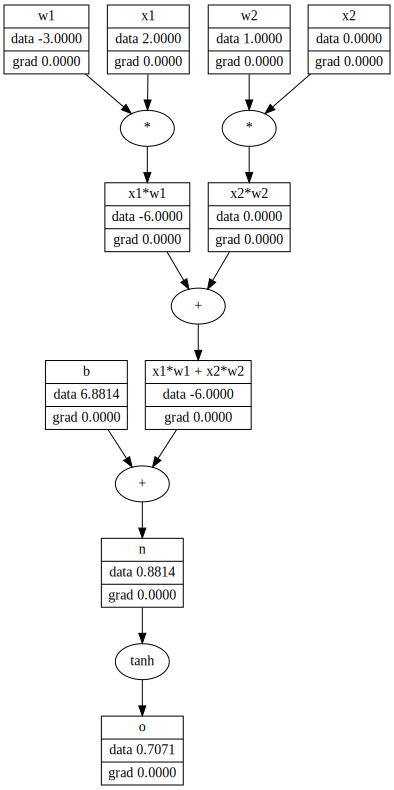

In [8]:
draw_dot(o)

In [15]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [14]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [13]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [12]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [11]:
o.grad = 1.0

## o = tanh(n)
## o = 0.7071
## do/dn = d/dn (tanh(n)) = 1 - tanh(n)**2 = 1 - o**2  ## 1 - o.data**2   ## 0.4999999999999999


In [16]:
n.grad = 5.0

# **Automatic Backward Propagation**

In [17]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out =  Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out =  Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)

    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out


In [40]:
## inputs x1 , x2

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

## weights w1, w2

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

## bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'


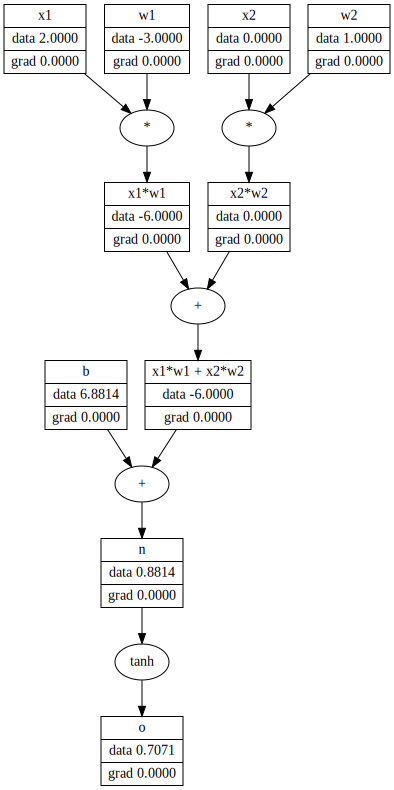

In [19]:
draw_dot(o)

In [20]:
o.grad = 1.0
o._backward()

In [21]:
n._backward()

In [22]:
b._backward()

In [23]:
x1w1x2w2._backward()

In [24]:
x1w1._backward()
x2w2._backward()

In [ ]:
# o.grad = 1.0

# ## topological graph

# topo = []

# visited = set()
# def build_topo(v):
#   if v not in visited:
#     visited.add(v)
#     for child in v._prev:
#       build_topo(child)
#     topo.append(v)
# build_topo(o)

# for node in reversed(topo):
#   node._backward()


[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [39]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out =  Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out =  Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def __pow__(self, other):
    out = Value(self.data**other, (self, ), f'**{other}')
    def _backward():
      self.grad += other * (self.data ** (other-1))
    out._backward = _backward
    return out

  def __rmul__(self, other):
    return self * other

  def __truediv__(self, other):
    return self * other**-1

  def __sub__(self, other):
    return self + (-other)

  def __neg__(self):
    return self * -1

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)

    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    return out


  def backward(self):
    ## topological graph
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


In [33]:
a = Value(2.0)
b = Value(4.0)
a / b

Value(data=0.5)

In [41]:
o.backward()

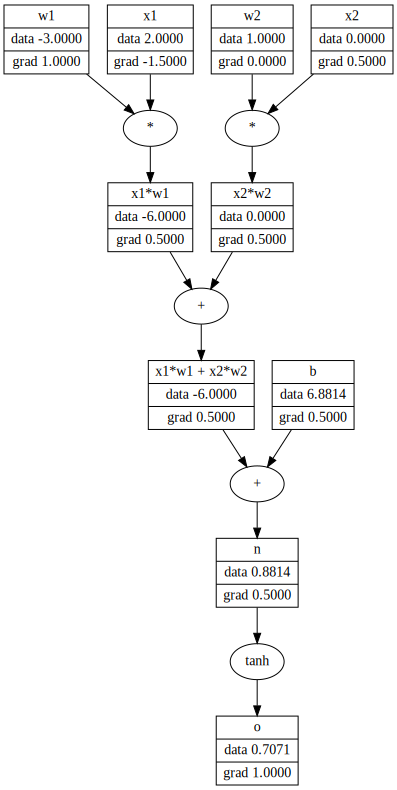

In [42]:
draw_dot(o)

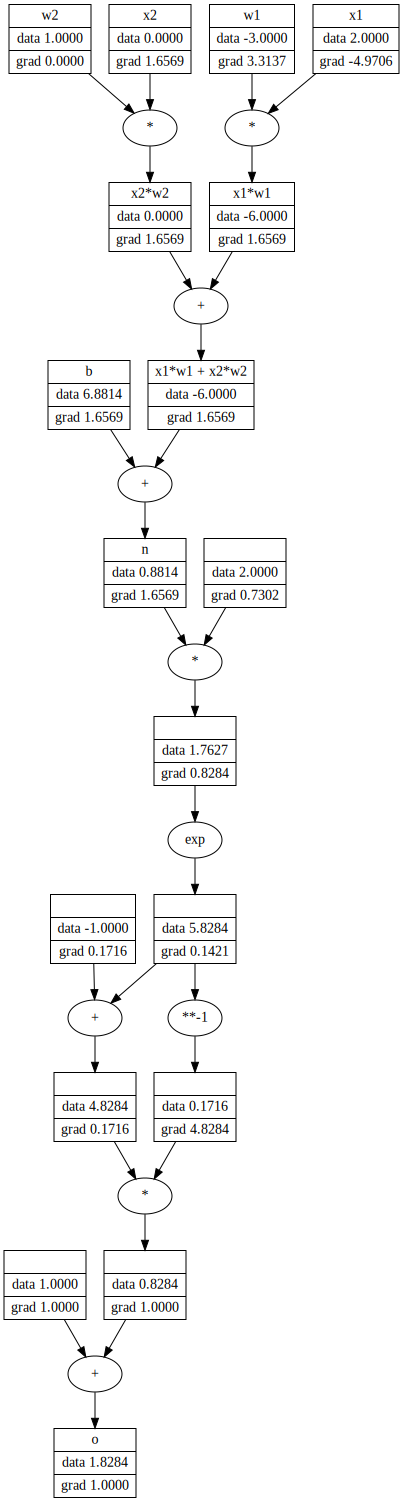

In [43]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# -------------------------
e = (2*n).exp()
o = (e - 1) / e + 1
# ----------------------------
o.label = 'o'
o.backward()
draw_dot(o)